# Environment set-up & Import libraries

In [ ]:
!pip install pandas-profiling -quit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime 
from pandas_profiling import ProfileReport

# Parameter & Func

In [2]:
startDate = datetime(2012,12,1)
endDate = datetime(2021,12,30)

sector_dict={
            'S&P 500 Materials Sector GICS Level 1 Index': 'material',
            'S&P 500 Energy Sector GICS Level 1 Index':	'energy',
            'S&P 500 Industrials Sector GICS Level 1 Index':'industrial',
            'S&P 500 Consumer Discretionary Sector GICS Level 1 Index':'consumer_discretionary',
            'S&P 500 Consumer Staples Sector GICS Level 1 Index':'consumer_staple',
            'S&P 500 Health Care Sector GICS Level 1 Index':'health_care',
            'S&P 500 Information Technology Sector GICS Level 1 Index':'IT',
            'S&P 500 Financials Sector GICS Level 1 Index': 'financial',
            'S&P 500 Real Estate Sector GICS Level 1 Index': 'real_estate',
            'S&P 500 Utilities Sector GICS Level 1 Index': 'utility',
            'S&P 500 Communication Services Sector GICS Level 1 Index':'telecom'
            }

sector_list = ['energy','material','industrial','consumer_discretionary','consumer_staple','health_care','financial','IT','telecom','utility','real_estate']

In [3]:
def clean_fdmt_data(df):
    df=df.drop(columns=['Unnamed: 0'])
    df=df.rename(columns={'3 Months Ending':'Dates'})
    df=df.set_index('Dates')
    df=df.rename(columns=sector_dict)
    df=df.truncate(after=endDate)
    return(df)

def factor_neutralize(df):
    df_cal=df.dropna()
    df_mean = df_cal.mean(axis=0)
    df_std = df_cal.std(axis=0)
    df_neutral = (df-df_mean)/df_std
    return(df_neutral)

def get_factor_exposure(sector):
    rename_dict={sector:'PE'}
    PE_exposures=PE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PB'}
    PB_exposures=PB_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2Sales'}
    EV2Sales_exposures=EV2Sales_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBIT'}
    EV2EBIT_exposures=EV2EBIT_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBITDA'}
    EV2EBITDA_exposures=EV2EBITDA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'DIV_Y'}
    DIV_Y_exposures=DIV_Y_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'GM'}
    GM_exposures=GM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'OM'}
    OM_exposures=OM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PM'}
    PM_exposures=PM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROA'}
    ROA_exposures=ROA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROE'}
    ROE_exposures=ROE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    factor_exposure=PE_exposures.join(PB_exposures).join(EV2Sales_exposures).join(EV2EBIT_exposures).join(EV2EBITDA_exposures).join(DIV_Y_exposures).join(GM_exposures).join(OM_exposures).join(PM_exposures).join(ROA_exposures).join(ROE_exposures)

    return(factor_exposure)

# Import datasets & Data cleasing

### Fundamental

In [4]:
#PE ratio
df=pd.read_excel('../data/Fundamentals/PE Ratio.xlsx',parse_dates=['3 Months Ending'])
PE_df=clean_fdmt_data(df)
PE_neutral=factor_neutralize(PE_df)

#PB ratio
df=pd.read_excel('../data/Fundamentals/PB Ratio.xlsx',parse_dates=['3 Months Ending'])
PB_df=clean_fdmt_data(df)
PB_neutral=factor_neutralize(PB_df)

#EV2Sales
df=pd.read_excel('../data/Fundamentals/EV2Sales.xlsx',parse_dates=['3 Months Ending'])
EV2Sales_df=clean_fdmt_data(df)
EV2Sales_neutral=factor_neutralize(EV2Sales_df)

#EV2EBIT
df=pd.read_excel('../data/Fundamentals/EV2EBIT.xlsx',parse_dates=['3 Months Ending'])
EV2EBIT_df=clean_fdmt_data(df)
EV2EBIT_neutral=factor_neutralize(EV2EBIT_df)

#EV2EBITDA
df=pd.read_excel('../data/Fundamentals/EV2EBITDA.xlsx',parse_dates=['3 Months Ending'])
EV2EBITDA_df=clean_fdmt_data(df)
EV2EBITDA_neutral=factor_neutralize(EV2EBITDA_df)

#Dividend Yield
df=pd.read_excel('../data/Fundamentals/Dividend Yield.xlsx',parse_dates=['3 Months Ending'])
DIV_Y_df=clean_fdmt_data(df)
DIV_Y_neutral=factor_neutralize(DIV_Y_df)

#Gross Margin
df=pd.read_excel('../data/Fundamentals/Gross Margin.xlsx',parse_dates=['3 Months Ending'])
GM_df=clean_fdmt_data(df)
GM_neutral=factor_neutralize(GM_df)

#Operating Margin
df=pd.read_excel('../data/Fundamentals/operatingmargin.xlsx',parse_dates=['3 Months Ending'])
OM_df=clean_fdmt_data(df)
OM_neutral=factor_neutralize(OM_df)

#profit Margin
df=pd.read_excel('../data/Fundamentals/profit margin.xlsx',parse_dates=['3 Months Ending'])
PM_df=clean_fdmt_data(df)
PM_neutral=factor_neutralize(PM_df)

#return on asset
df=pd.read_excel('../data/Fundamentals/return on asset.xlsx',parse_dates=['3 Months Ending'])
ROA_df=clean_fdmt_data(df)
ROA_neutral=factor_neutralize(ROA_df)

#return on equity
df=pd.read_excel('../data/Fundamentals/return on equity.xlsx',parse_dates=['3 Months Ending'])
ROE_df=clean_fdmt_data(df)
ROE_neutral=factor_neutralize(ROE_df)

### Daily index data

In [5]:
index_data = {}

for sector in sector_list:
    df_tmp = pd.read_csv('../data/index data/'+ sector + '_index.csv')
    df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])
    index_data[sector] = df_tmp

# EDA

In [21]:
# Create pandas profiling report for all daily index data

for sector in sector_list:
    profile = ProfileReport(index_data[sector], title=sector, explorative=True)
    profile.to_file("../EDA_Results/"+ sector +"_index.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Start & End date of dataset from each sector
d
res_lst = []
for sector in sector_list:
    res_lst += [[sector, min(index_data[sector]['Date']), max(index_data[sector]['Date'])]]

pd.DataFrame(res_lst, columns=['Sector', 'Start_Date', 'End_Date'])

,Sector,Start_Date,End_Date
0,energy,1999-12-31,2022-02-22
1,material,1999-12-31,2022-02-22
2,industrial,1999-12-31,2022-02-22
3,consumer_discretionary,2001-01-02,2022-02-24
4,consumer_staple,2001-01-02,2022-02-24
5,health_care,2001-01-02,2022-02-24
6,financial,2000-01-03,2022-02-23
7,IT,2000-01-03,2022-02-23
8,telecom,2000-01-03,2022-02-23
9,utility,2001-01-02,2022-02-24


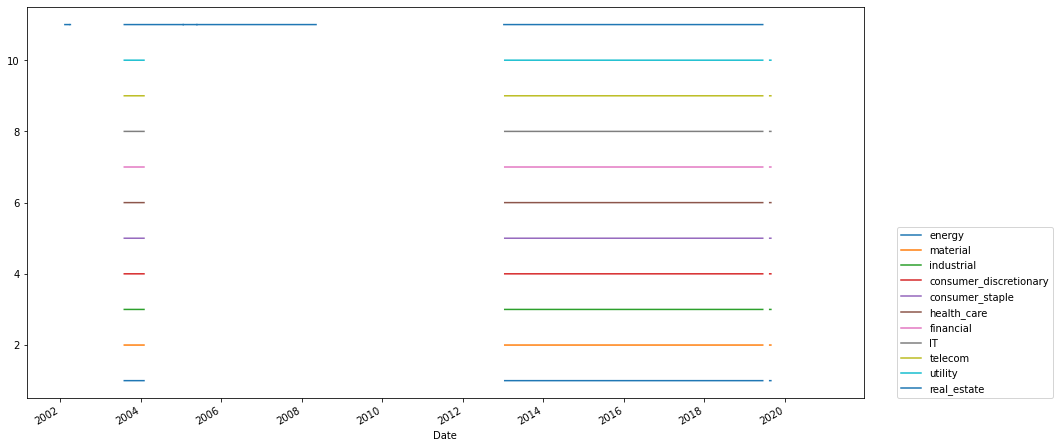

In [48]:
# Check dates missing Volumn data

cnt = 1
df_res = index_data[sector_list[0]][['Date']]

for sector in sector_list:
    df_tmp = index_data[sector].copy()
    df_tmp.loc[df_tmp['Volume'] == 0, sector] = cnt
    df_res = df_res.merge(df_tmp[['Date', sector]], on='Date')
    cnt += 1

df_res.plot(x='Date', y=sector_list, figsize=(15,8))
plt.legend(loc=(1.04,0))

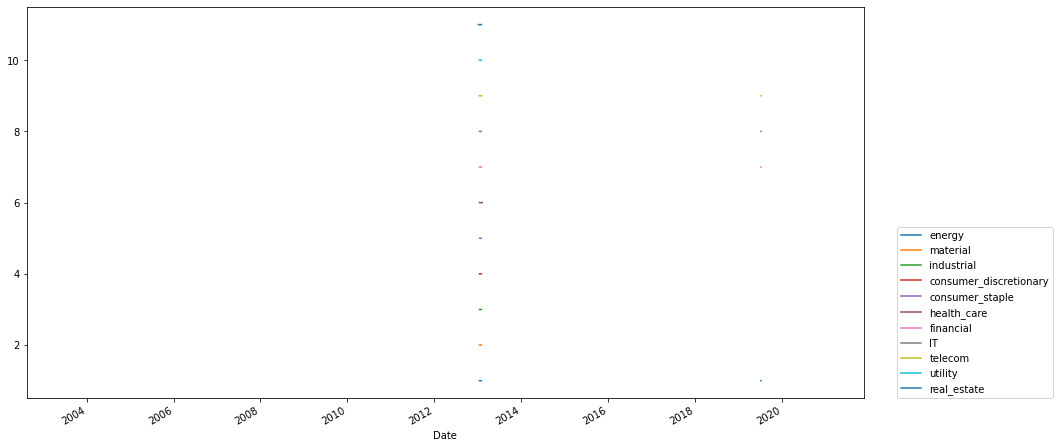

In [49]:
# Check out for all records how many records have same trading prices data (high and low)

cnt = 1
df_res = index_data[sector_list[0]][['Date']]

for sector in sector_list:
    df_tmp = index_data[sector].copy()
    df_tmp.loc[df_tmp['High'] == df_tmp['Low'], sector] = cnt
    df_res = df_res.merge(df_tmp[['Date', sector]], on='Date')
    cnt += 1

df_res.plot(x='Date', y=sector_list, figsize=(15,8))
plt.legend(loc=(1.04,0))

In [50]:
# Check out whether for all records that have non-zero volumn, trading prices data (high and low) are not the same

res_lst = []
for sector in sector_list:
    df_tmp = index_data[sector].copy()
    df_tmp.loc[df_tmp['High'] == df_tmp['Low'], 'Flag'] = 1
    df_tmp['Flag'] = df_tmp['Flag'].fillna(0)
    res_lst += [[sector, sum(df_tmp['Flag'])]]

pd.DataFrame(res_lst, columns=['Sector', 'Number of records that might have a problem'])

,Sector,Number of records that might have a problem
0,energy,503.0
1,material,497.0
2,industrial,498.0
3,consumer_discretionary,245.0
4,consumer_staple,244.0
5,health_care,250.0
6,financial,500.0
7,IT,499.0
8,telecom,499.0
9,utility,245.0


In [15]:
# Check out whether for all records that have non-zero volumn, trading prices data (high and low) are not the same

res_lst = []
for sector in sector_list:
    df_tmp = index_data[sector].copy()
    df_tmp = df_tmp[df_tmp['Date']>'2002-01-01'].reset_index(drop=True)
    df_tmp.loc[df_tmp['High'] == df_tmp['Low'], 'Flag'] = 1
    df_tmp['Flag'] = df_tmp['Flag'].fillna(0)
    res_lst += [[sector, sum(df_tmp['Flag'])]]

pd.DataFrame(res_lst, columns=['Sector', 'Number of records that might have a problem'])

,Sector,Number of records that might have a problem
0,energy,20.0
1,material,14.0
2,industrial,15.0
3,consumer_discretionary,15.0
4,consumer_staple,14.0
5,health_care,20.0
6,financial,18.0
7,IT,16.0
8,telecom,17.0
9,utility,14.0


Some findings:
1. For some dates, highest trading prices equals to lowest trading price and/or with trading volumn equals to 0
2. All sectors have very similar time period where volume data is missing as well. The real estate sector is slightly different from the others. This arguably indicates a flaw in Bloomberg's data collection process
3. Most records all sectors have where trading price high equals to trading price low are prior to Jan 2002. Thus in this analysis, we only use data from 2002. There is a short period of time in 2013 that also has this problem. We decided to include this part of time since the fraction is small and we will not have an empty interval in time series analysis.

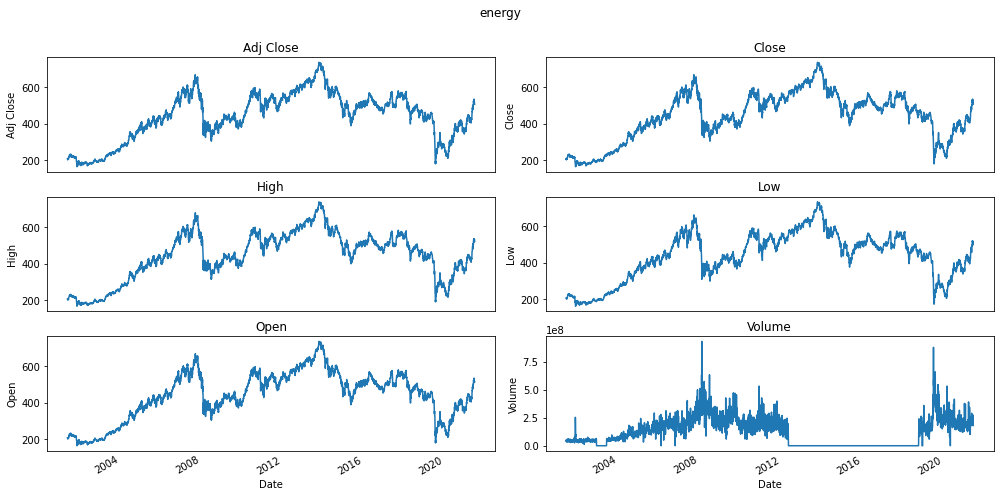

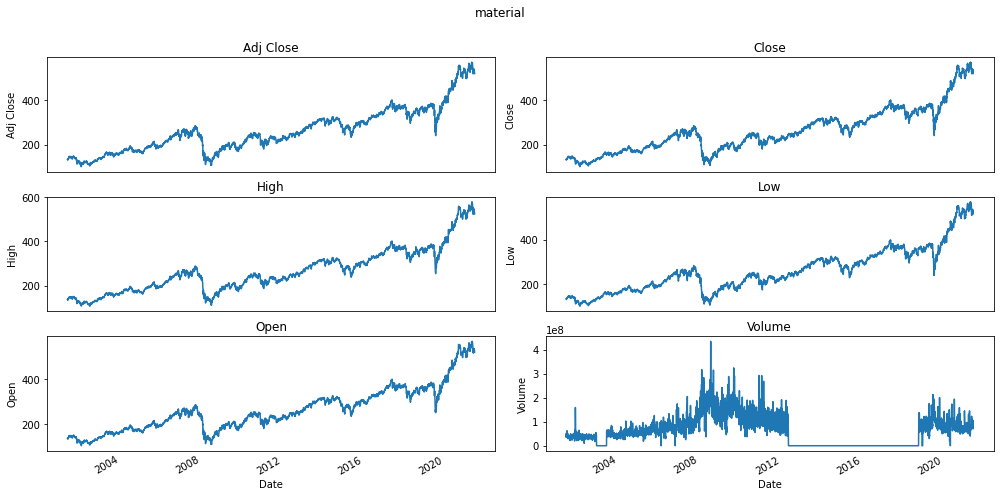

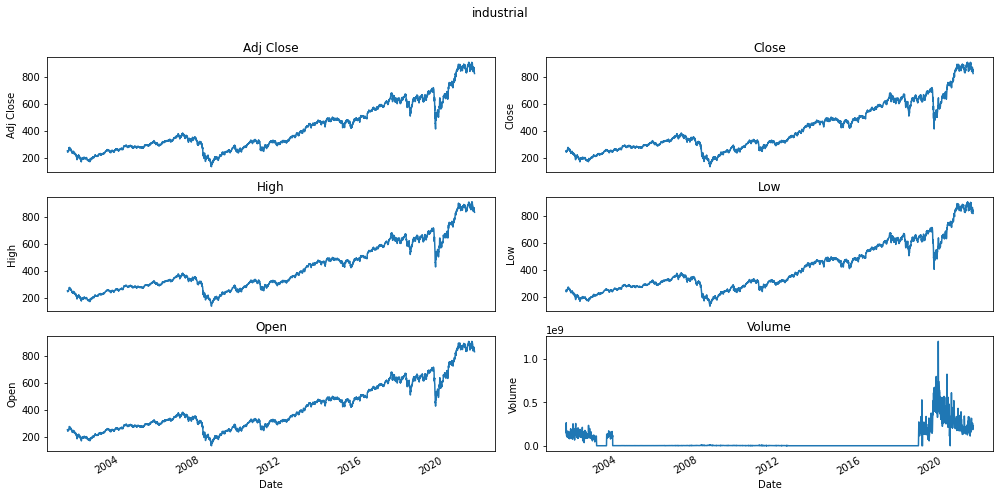

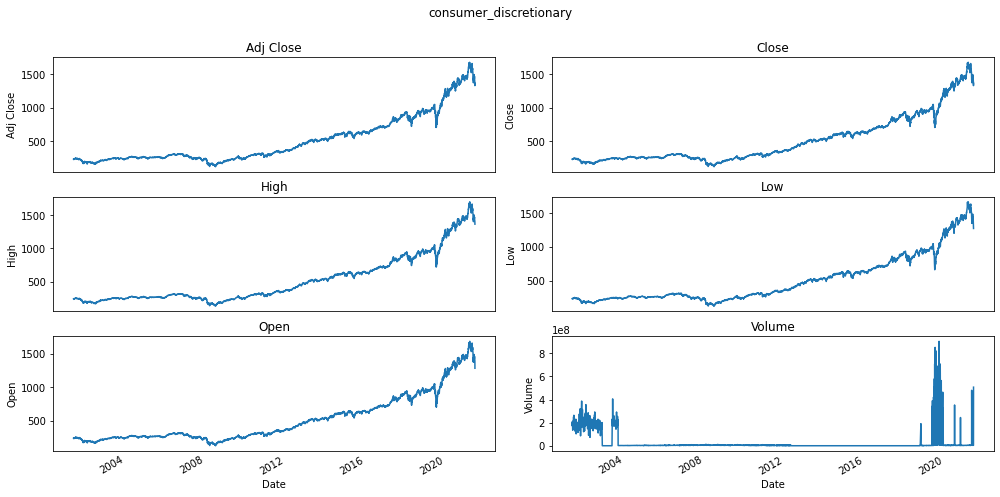

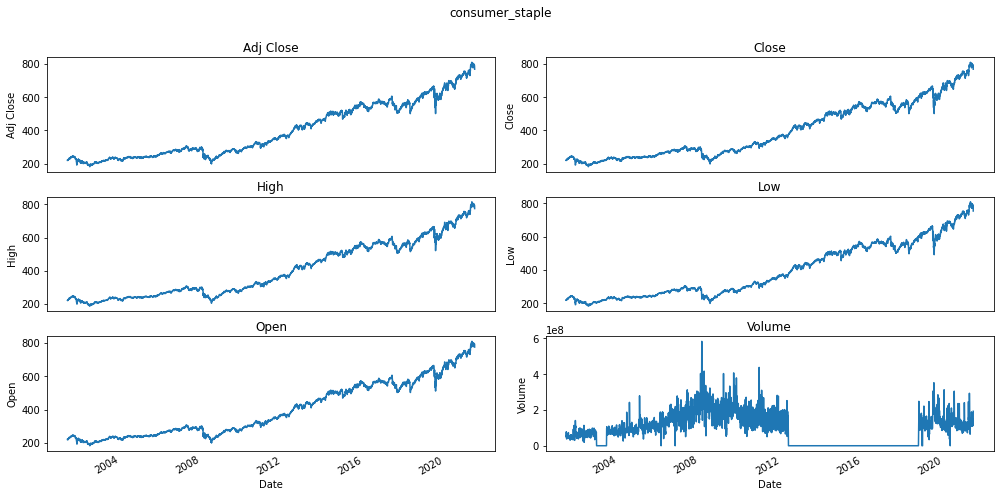

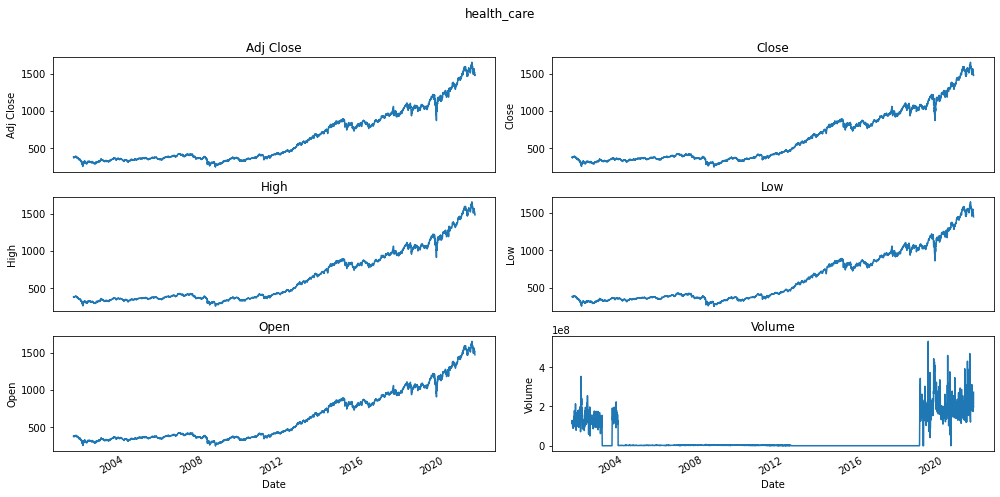

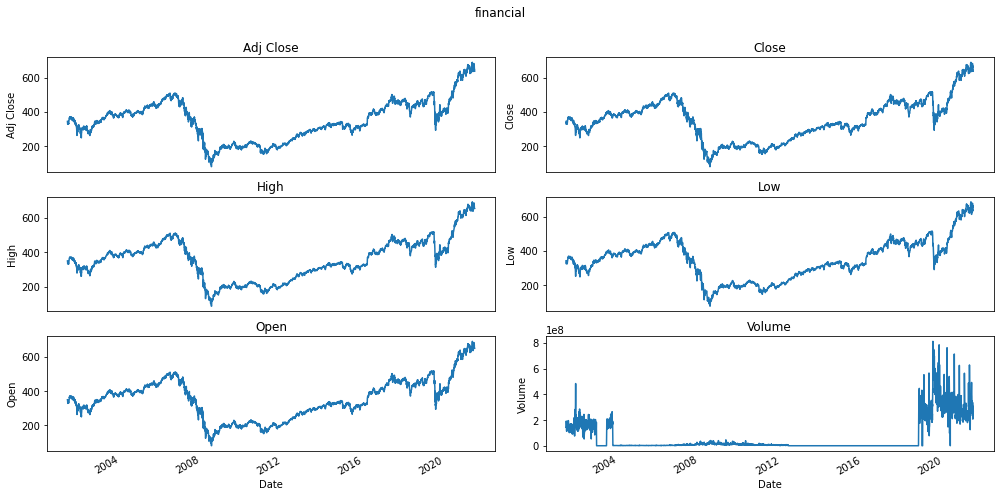

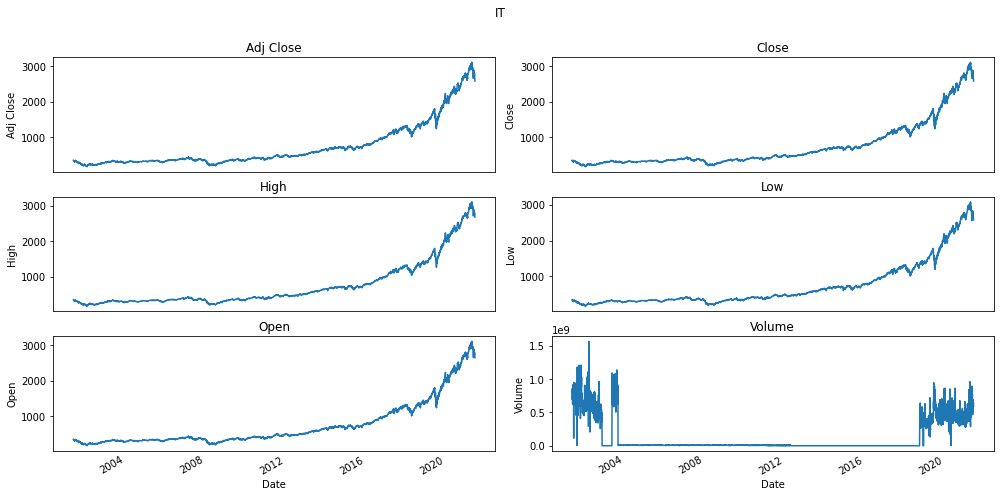

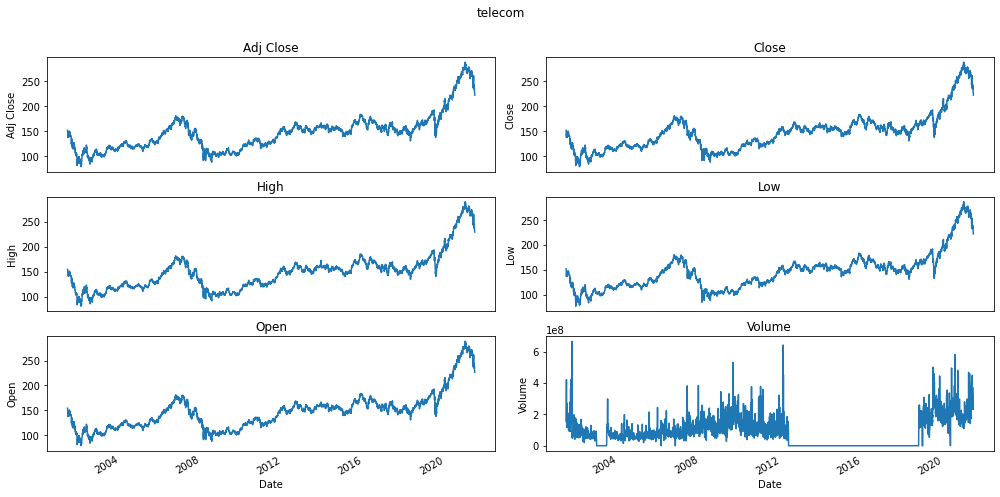

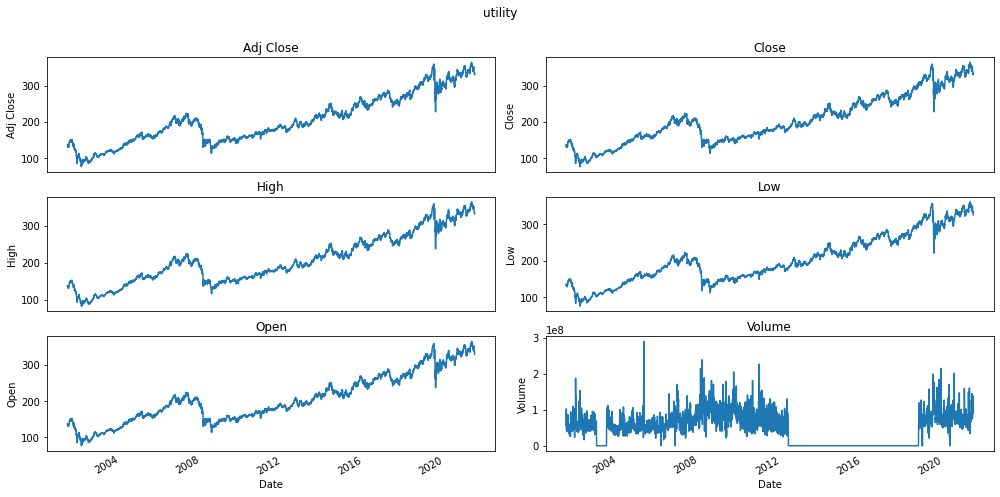

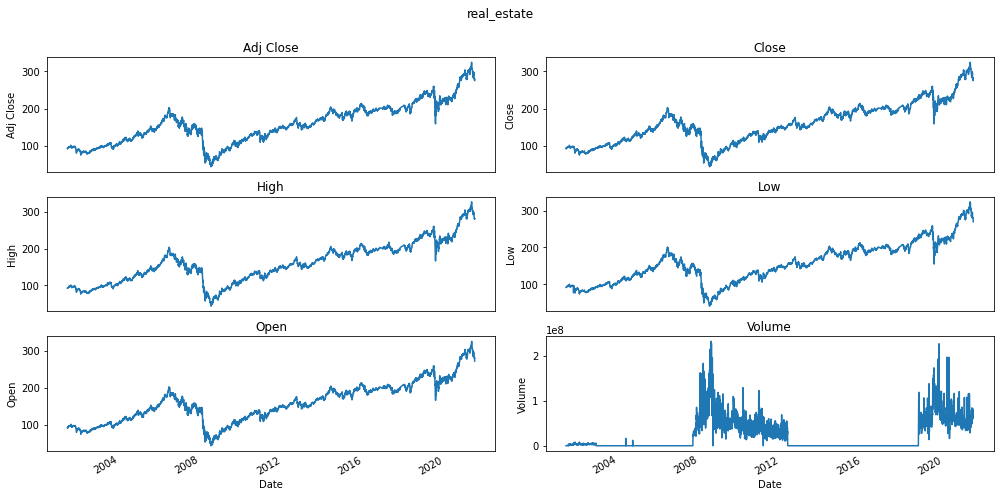

In [23]:
# Plot index changes over time

for sector in sector_list:
    df_plot = index_data[sector].copy()
    df_plot = df_plot[df_plot['Date']>='2002-02-01']
    df_plot = df_plot.set_index('Date')
    list_length = df_plot.shape[1]
    ncols = 2
    nrows = int(round(list_length / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i in range(0, list_length):
            ax = plt.subplot(nrows,ncols,i+1)
            sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
            ax.set_title(df_plot.columns[i])
            ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    fig.suptitle(sector)
    fig.subplots_adjust(top=0.88)
    plt.show()
    print('')

In [24]:
# For some sectors, the volume data seems to be werid??? Is the currency or unit consistent?
# Useful ones: energy, material, consumer_staple, telecom, utility

### Some pre-processing for quarter data

In [14]:
q_dict = {'PE':PE_neutral, 'PB':PB_neutral, 'EV2Sales':EV2Sales_neutral, 'EV2EBIT':EV2EBIT_neutral, 'EV2EBITDA':EV2EBITDA_neutral,
       'DIV_Y':DIV_Y_neutral, 'GM':GM_neutral, 'OM':OM_neutral, 'PM':PM_neutral,'ROA':ROA_neutral, 'ROE':ROE_neutral}

In [22]:
lst = []
for measure in q_dict.keys():
    lst += [[measure, min(q_dict[measure].index), max(q_dict[measure].index)]]
pd.DataFrame(lst, columns=['Measure','Start_Date','End_Date'])

,Measure,Start_Date,End_Date
0,PE,2012-12-31,2021-09-30
1,PB,2012-12-31,2021-09-30
2,EV2Sales,2012-12-31,2021-09-30
3,EV2EBIT,2012-12-31,2021-09-30
4,EV2EBITDA,2012-12-31,2021-09-30
5,DIV_Y,2012-12-31,2021-09-30
6,GM,2012-12-31,2021-09-30
7,OM,2012-12-31,2021-09-30
8,PM,2012-12-31,2021-09-30
9,ROA,2012-12-31,2021-09-30


In [27]:
PE_neutral.reset_index().dtypes

Dates                     datetime64[ns]
material                         float64
energy                           float64
industrial                       float64
consumer_discretionary           float64
consumer_staple                  float64
health_care                      float64
IT                               float64
financial                        float64
real_estate                      float64
utility                          float64
telecom                          float64
dtype: object

In [39]:
index_data_p = {}
for sector in index_data.keys():
    df_index_tmp = index_data[sector]
    df_index_tmp = df_index_tmp[(df_index_tmp['Date']>=pd.Timestamp(2012,12,31))&(df_index_tmp['Date']<pd.Timestamp(2022,1,1))]
    
    df_q_tmp = pd.DataFrame(index=q_dict['PE'].index)
    for measure in q_dict.keys():
        df_q_tmp = df_q_tmp.merge(q_dict[measure][[sector]], left_index=True, right_index=True).rename(columns={sector:measure})
    df_q_tmp = df_q_tmp.reset_index().rename(columns={'Dates':'Date'})
    
    df_tmp = df_index_tmp.merge(df_q_tmp, on='Date', how='left')
    df_tmp = df_tmp.sort_values('Date').fillna(method="ffill")
    
    index_data_p[sector] = df_tmp.copy()
    
index_data_p['energy'].head(3)

,Date,Adj Close,Close,High,Low,Open,Volume,PE,PB,EV2Sales,EV2EBIT,EV2EBITDA,DIV_Y,GM,OM,PM,ROA,ROE
0,2012-12-31,527.750000,527.750000,528.179993,519.960022,522.030029,95333200,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
1,2013-01-02,545.390015,545.390015,545.440002,532.960022,532.960022,201635400,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
2,2013-01-03,545.330017,545.330017,549.070007,542.260010,545.390015,123108800,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666


In [36]:
# Ehhh, what is wrong with GM?

# Prediction w/o quarterly based data

- Reference
https://www.relataly.com/stock-market-prediction-using-multivariate-time-series-in-python/1815/

In [37]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns

In [34]:
df = index_data['energy'].copy()
df = df[df['Date']>='2002/2/1'].reset_index(drop=True)
df['Month'] = pd.DatetimeIndex(df['Date']).month
df = df[['High','Low','Open','Close','Month']]
df_ext = df.copy()
df_ext['Prediction'] = df_ext['Close']

# Get the number of rows in the data
nrows = df.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(df)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(df_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
data = index_data['energy'].copy()
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(5050, 5)
(3990, 50, 5) (3990,)
(1010, 50, 5) (1010,)
0.09763885667274219
0.09763885667274219


In [36]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

250 50 5
Epoch 1/50
250/250 [==============================] - 35s 58ms/step - loss: 0.0135 - val_loss: 5.8748e-04
Epoch 2/50
250/250 [==============================] - 15s 61ms/step - loss: 4.3716e-04 - val_loss: 4.6354e-04
Epoch 3/50
250/250 [==============================] - 17s 66ms/step - loss: 3.4855e-04 - val_loss: 3.5566e-04
Epoch 4/50
250/250 [==============================] - 18s 74ms/step - loss: 3.3375e-04 - val_loss: 3.3994e-04
Epoch 5/50
250/250 [==============================] - 17s 68ms/step - loss: 2.7480e-04 - val_loss: 2.0228e-04
Epoch 6/50
250/250 [==============================] - 22s 89ms/step - loss: 1.8044e-04 - val_loss: 2.2854e-04
Epoch 7/50
250/250 [==============================] - 24s 95ms/step - loss: 1.4758e-04 - val_loss: 2.4877e-04
Epoch 8/50
250/250 [==============================] - 23s 94ms/step - loss: 9.6413e-05 - val_loss: 1.4663e-04
Epoch 9/50
250/250 [==============================] - 17s 66ms/step - loss: 7.5759e-05 - val_loss: 6.7522e-05
Epoch

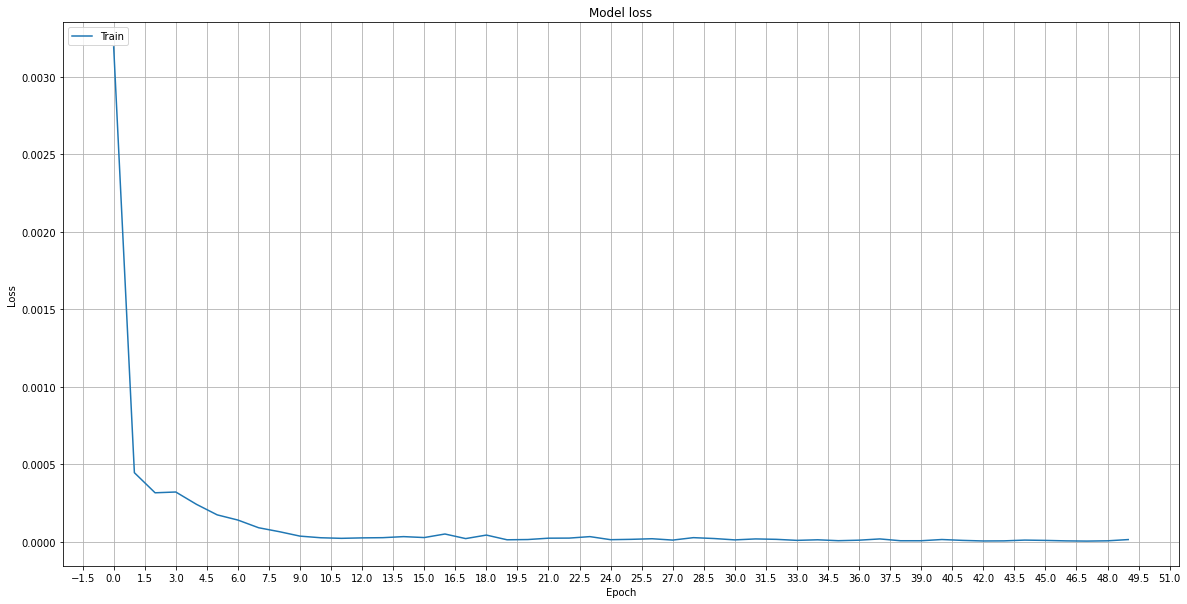

In [37]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [38]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 2.22
Mean Absolute Percentage Error (MAPE): 0.52 %
Median Absolute Percentage Error (MDAPE): 0.54 %


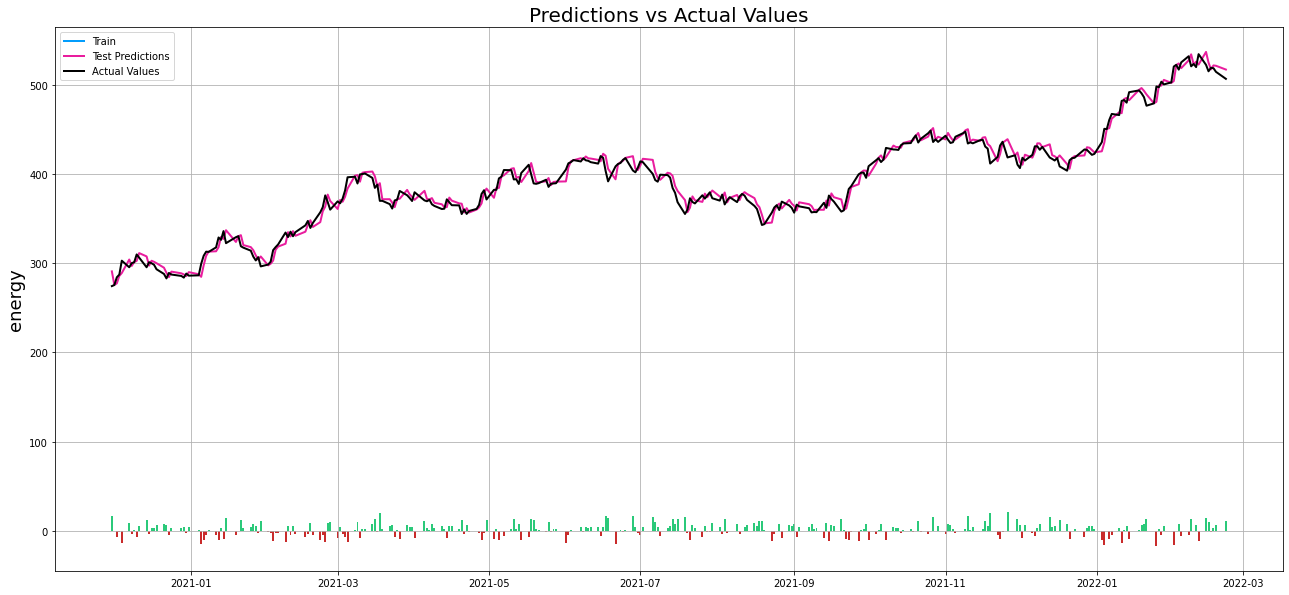

In [42]:
# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
df = index_data['energy'].copy()
df = df[df['Date']>='2002/2/1'].reset_index(drop=True)
data_filtered_sub = df.copy()
data_filtered_sub['Date'] = df['Date']

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel('energy', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

In [ ]:
# Add momentum factor
# The result is too good?

In [54]:
# Indexing Batches
train_df = index_data['energy'].sort_values(by=['Date']).copy()
train_df = train_df[train_df['Date']>=pd.Timestamp(2002,2,1)].reset_index(drop=True)
# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df[['Date']]

# Adding Month and Year in separate columns
# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
# train_df['Year'] = d.strftime("%Y") 

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-12-31,212.720001,212.720001,212.720001,212.720001,212.720001,0
1,2000-01-03,206.580002,206.580002,206.580002,206.580002,206.580002,0
2,2000-01-04,202.380005,202.380005,202.380005,202.380005,202.380005,0
3,2000-01-05,208.559998,208.559998,208.559998,208.559998,208.559998,0
4,2000-01-06,218.139999,218.139999,218.139999,218.139999,218.139999,0


In [57]:
# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close'
            #, 'Month', 'Year', 'Adj Close'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close']


,High,Low,Open,Close,Prediction
5567,522.659973,505.579987,522.659973,515.419983,515.419983
5568,528.409973,515.419983,515.419983,519.340027,519.340027
5569,524.119995,515.049988,519.340027,518.900024,518.900024
5570,519.349976,510.459992,518.900024,514.820007,514.820007
5571,530.479981,499.450012,514.820007,506.950012,506.950012


In [43]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(5572, 4)


In [44]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(4408, 50, 4) (4408,)
(1114, 50, 4) (1114,)
0.07394027002696207
0.07394027002696207


In [45]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

200 50 4


In [46]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
276/276 [==============================] - 32s 43ms/step - loss: 0.0150 - val_loss: 7.4140e-04
Epoch 2/50
276/276 [==============================] - 10s 37ms/step - loss: 4.3974e-04 - val_loss: 4.8095e-04
Epoch 3/50
276/276 [==============================] - 11s 39ms/step - loss: 3.2608e-04 - val_loss: 4.3837e-04
Epoch 4/50
276/276 [==============================] - 11s 39ms/step - loss: 2.7108e-04 - val_loss: 2.9869e-04
Epoch 5/50
276/276 [==============================] - 11s 39ms/step - loss: 2.6466e-04 - val_loss: 2.4749e-04
Epoch 6/50
276/276 [==============================] - 11s 39ms/step - loss: 2.4152e-04 - val_loss: 1.7594e-04
Epoch 7/50
276/276 [==============================] - 11s 40ms/step - loss: 1.5682e-04 - val_loss: 1.6951e-04
Epoch 8/50
276/276 [==============================] - 11s 39ms/step - loss: 1.0123e-04 - val_loss: 1.0026e-04
Epoch 9/50
276/276 [==============================] - 11s 41ms/step - loss: 9.3222e-05 - val_loss: 6.9710e-05
Epoch 10/50
27

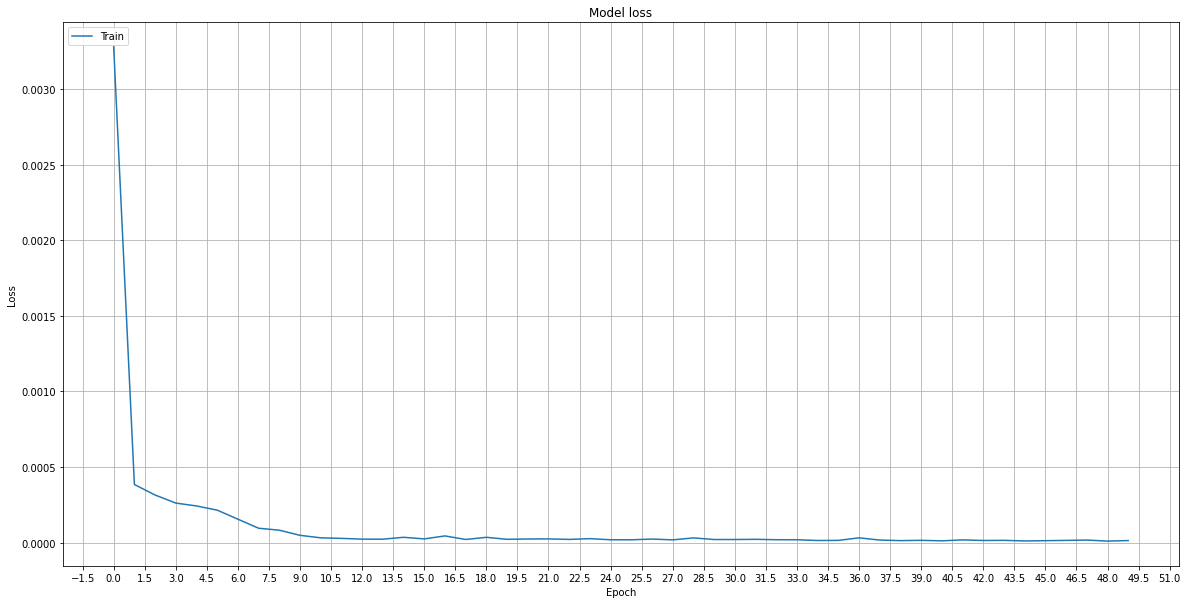

In [47]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [48]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 2.41
Mean Absolute Percentage Error (MAPE): 0.55 %
Median Absolute Percentage Error (MDAPE): 0.57 %


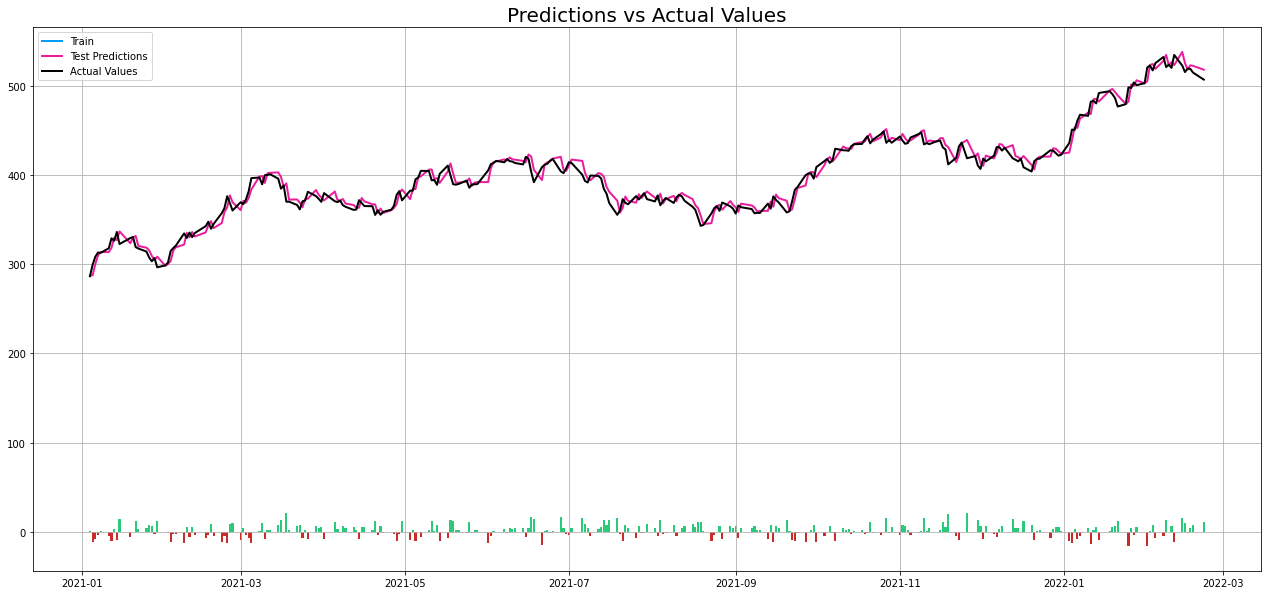

In [56]:
# The date from which on the date is displayed
# display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] >=pd.Timestamp(2021,1,1)]
train = train[train['Date'] >=pd.Timestamp(2021,1,1)]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

# Prediction w/ quarterly based data

In [40]:
index_data_p['energy'].head(3)

,Date,Adj Close,Close,High,Low,Open,Volume,PE,PB,EV2Sales,EV2EBIT,EV2EBITDA,DIV_Y,GM,OM,PM,ROA,ROE
0,2012-12-31,527.750000,527.750000,528.179993,519.960022,522.030029,95333200,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
1,2013-01-02,545.390015,545.390015,545.440002,532.960022,532.960022,201635400,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
2,2013-01-03,545.330017,545.330017,549.070007,542.260010,545.390015,123108800,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666


In [60]:
# Indexing Batches
train_df = index_data_p['energy'].sort_values(by=['Date']).copy()
# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df[['Date']]

# Adding Month and Year in separate columns
# d = pd.to_datetime(train_df.index)
# train_df['Month'] = d.strftime("%m")
# train_df['Year'] = d.strftime("%Y") 

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume,PE,PB,EV2Sales,EV2EBIT,EV2EBITDA,DIV_Y,GM,OM,PM,ROA,ROE
0,2012-12-31,527.750000,527.750000,528.179993,519.960022,522.030029,95333200,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
1,2013-01-02,545.390015,545.390015,545.440002,532.960022,532.960022,201635400,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
2,2013-01-03,545.330017,545.330017,549.070007,542.260010,545.390015,123108800,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
3,2013-01-04,550.559998,550.559998,551.119995,544.849976,544.849976,157331400,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666
4,2013-01-07,546.059998,546.059998,550.559998,544.020019,550.559998,165848300,-0.501703,0.22161,-1.625449,-1.249542,-0.965072,-1.175427,NaN,1.494623,1.20066,1.753084,1.666


In [61]:
# List of considered Features
FEATURES = ['High','Low','Open','PE','PB','EV2Sales','EV2EBIT','EV2EBITDA','DIV_Y','OM','PM','ROA','ROE','Close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'PE', 'PB', 'EV2Sales', 'EV2EBIT', 'EV2EBITDA', 'DIV_Y', 'OM', 'PM', 'ROA', 'ROE', 'Close']


,High,Low,Open,PE,PB,EV2Sales,EV2EBIT,EV2EBITDA,DIV_Y,OM,PM,ROA,ROE,Close,Prediction
2263,427.929993,413.690002,418.369995,-0.438912,0.22161,-0.591072,0.125749,-0.882084,0.148792,0.462958,0.540128,0.511151,0.576331,427.739990,427.739990
2264,431.309998,424.989990,427.739990,-0.438912,0.22161,-0.591072,0.125749,-0.882084,0.148792,0.462958,0.540128,0.511151,0.576331,427.250000,427.250000
2265,428.559998,422.619995,427.250000,-0.438912,0.22161,-0.591072,0.125749,-0.882084,0.148792,0.462958,0.540128,0.511151,0.576331,424.549988,424.549988
2266,427.850006,421.440002,424.549988,-0.438912,0.22161,-0.591072,0.125749,-0.882084,0.148792,0.462958,0.540128,0.511151,0.576331,421.679993,421.679993
2267,424.980011,420.230011,421.679993,-0.438912,0.22161,-0.591072,0.125749,-0.882084,0.148792,0.462958,0.540128,0.511151,0.576331,422.739990,422.739990


In [62]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(2268, 14)


In [63]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1765, 50, 14) (1765,)
(453, 50, 14) (453,)
0.7174716825676852
0.7174716825676852


In [64]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

700 50 14


In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Epoch 1/50
111/111 [==============================] - 97s 853ms/step - loss: 1.2995 - val_loss: 0.0031
Epoch 2/50
111/111 [==============================] - 89s 802ms/step - loss: 7.1421e-04 - val_loss: 0.0014
Epoch 3/50
111/111 [==============================] - 87s 782ms/step - loss: 7.0566e-04 - val_loss: 0.0011
Epoch 4/50
111/111 [==============================] - 87s 783ms/step - loss: 5.4868e-04 - val_loss: 0.0017
Epoch 5/50
111/111 [==============================] - 88s 797ms/step - loss: 5.7251e-04 - val_loss: 9.8274e-04
Epoch 6/50
111/111 [==============================] - 87s 785ms/step - loss: 5.2035e-04 - val_loss: 0.0011
Epoch 7/50
111/111 [==============================] - 87s 782ms/step - loss: 5.1363e-04 - val_loss: 0.0013
Epoch 8/50
111/111 [==============================] - 110s 994ms/step - loss: 4.2540e-04 - val_loss: 8.2443e-04
Epoch 9/50
111/111 [==============================] - 114s 1s/step - loss: 4.7498e-04 - val_loss: 7.4432e-04
Epoch 10/50
111/111 [=========

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

In [ ]:
# The date from which on the date is displayed
# display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] >=pd.Timestamp(2021,1,1)]
train = train[train['Date'] >=pd.Timestamp(2021,1,1)]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()